# 주성분분석

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns; sns.set()
plt.rcParams['font.family']='Malgun Gothic'

## 1. mean centering, standard covariance

In [2]:
X = np.array([[2,3,11],[3,5,8], [4,7,5], [3,5,8]])
X

array([[ 2,  3, 11],
       [ 3,  5,  8],
       [ 4,  7,  5],
       [ 3,  5,  8]])

In [3]:
mean_centering_X = X - np.mean(X, axis=0)
mean_centering_X
mean_centering_X.shape

array([[-1., -2.,  3.],
       [ 0.,  0.,  0.],
       [ 1.,  2., -3.],
       [ 0.,  0.,  0.]])

(4, 3)

In [4]:
np.cov(mean_centering_X.T)

array([[ 0.66666667,  1.33333333, -2.        ],
       [ 1.33333333,  2.66666667, -4.        ],
       [-2.        , -4.        ,  6.        ]])

In [5]:
(mean_centering_X.T@mean_centering_X)/3

array([[ 0.66666667,  1.33333333, -2.        ],
       [ 1.33333333,  2.66666667, -4.        ],
       [-2.        , -4.        ,  6.        ]])

## 2. 주성분 분석(PCA)과 시각화

In [6]:
X1 = np.array([int(num) for num in np.linspace(0, 15, 10)]).reshape(2,5)
X2 = np.array([int(num) for num in np.linspace(20, 55, 10)]).reshape(2,5)
X = np.concatenate((X1, X2))
X

array([[ 0,  1,  3,  5,  6],
       [ 8, 10, 11, 13, 15],
       [20, 23, 27, 31, 35],
       [39, 43, 47, 51, 55]])

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X) # 평균조정된 X
print(f'평균: {X_scaled.mean().round(2)}, 표준펀차: {X_scaled.std()}')

평균: 0.0, 표준펀차: 1.0


In [8]:
np.dot(X_scaled.T, X_scaled).round(2) # X_scaled.T@X_scaled
print(f'공분산은: {np.trace(np.dot(X_scaled.T, X_scaled))}')

array([[4.  , 4.  , 3.99, 3.99, 3.98],
       [4.  , 4.  , 4.  , 3.99, 3.98],
       [3.99, 4.  , 4.  , 4.  , 3.99],
       [3.99, 3.99, 4.  , 4.  , 4.  ],
       [3.98, 3.98, 3.99, 4.  , 4.  ]])

공분산은: 20.0


Text(0.5, 0, '주성분 개 수')

Text(0, 0.5, '총변동량 누적 설명 비율')

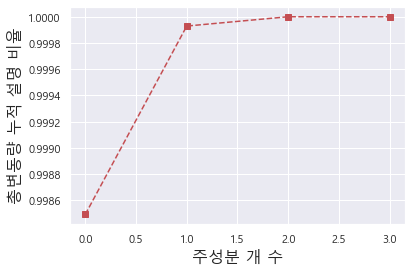

In [9]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'rs--')
plt.xlabel('주성분 개 수', fontsize='16')
plt.ylabel('총변동량 누적 설명 비율', fontsize='16')

In [10]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print('총변동량 설명비율 (%) :', np.round(pca.explained_variance_ratio_*100, 2))

PCA(n_components=2)

총변동량 설명비율 (%) : [99.85  0.14]


In [11]:
(X_pca.T@X_pca).round(2)
print(f'공분산은: {np.trace(np.dot(X_pca.T, X_pca))}')
(np.trace(np.dot(X_pca.T, X_pca))/20)*100

array([[19.97,  0.  ],
       [ 0.  ,  0.03]])

공분산은: 19.998582676597607


99.99291338298804

- In general, for any matrix, the eigenvectors are NOT always orthogonal. 
- But for a special type of matrix, symmetric matrix, the eigenvalues are always real and the corresponding eigenvectors are always orthogonal. 
- The PCA is applied on this symmetric matrix, so the eigenvectors are guaranteed to be orthogonal.

 * In linear algebra, a symmetric matrix is a square matrix that is equal to its transpose.

In [12]:
from sklearn.decomposition import PCA
X
pca = PCA(n_components=2)
pca.fit(X)
pca.transform(X)

array([[ 0,  1,  3,  5,  6],
       [ 8, 10, 11, 13, 15],
       [20, 23, 27, 31, 35],
       [39, 43, 47, 51, 55]])

PCA(n_components=2)

array([[-42.98256624,   0.08227559],
       [-24.24186219,  -1.35750479],
       [ 11.5318988 ,   2.27335449],
       [ 55.69252964,  -0.99812529]])

## 3. PCA for visualization: Handwritten digits

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [14]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [15]:
pca = PCA(2) # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


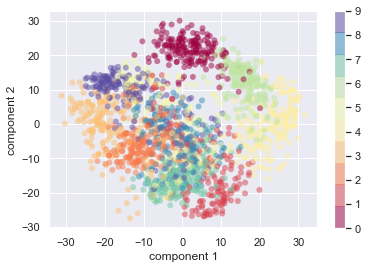

In [16]:
sns.set()  # dmatnrk 꺠지기 떄문에
plt.scatter(projected[:, 0], projected[:, 1],
c=digits.target, edgecolor='none', alpha=0.5,
cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

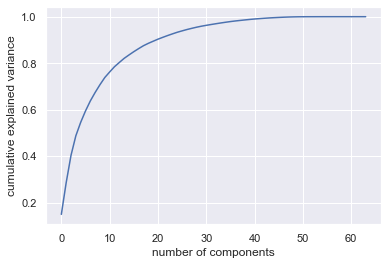

In [17]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Noise elimination

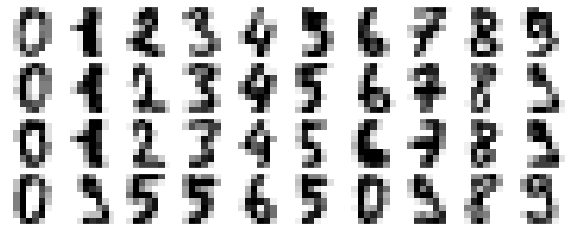

In [18]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
        
plot_digits(digits.data)

In [19]:
digits.data.shape
digits.data[0]
digits.data

(1797, 64)

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

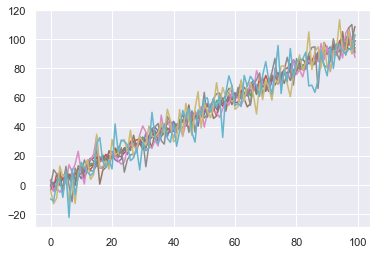

In [20]:
a = np.arange(100)
for i in range(10):
    plt.plot(np.random.normal(a, i))

In [21]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4) # 평균은 각 원소값으로 하고 표준편차는 4로 하면 노이즈 발생
noisy

array([[ 1.98685661, -0.5530572 ,  7.59075415, ..., -0.74263591,
        -4.4253399 , -4.7848265 ],
       [ 3.25010329,  5.42496011, -0.28804049, ..., 18.7618225 ,
        -3.9621453 , -2.26519092],
       [ 0.39860546, -2.01390262, -6.20265372, ...,  9.9406111 ,
         7.21394019,  3.42559518],
       ...,
       [-0.27421367,  1.02016505,  2.02107934, ..., -2.43039494,
         0.41158359, -3.05111873],
       [-1.41837966,  5.38259737,  5.63353997, ...,  8.24648231,
         6.78527979, -1.43448215],
       [ 0.93153787, 11.71265852, 17.3765841 , ..., 18.11407767,
        -3.96518878,  4.47022123]])

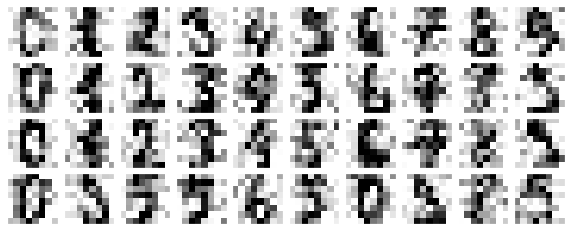

In [22]:
plot_digits(noisy)

In [23]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

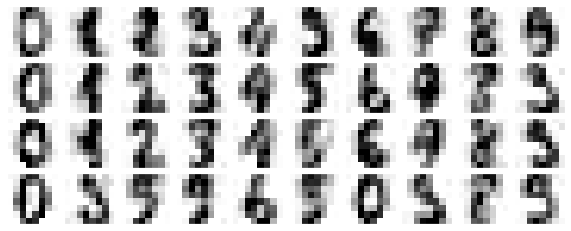

In [24]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

## 4. 소비자행태분석 자료

In [45]:
dir_path = 'D:/한양대학교/data/'

In [47]:
df = pd.read_pickle(dir_path + 'consumer_01_34.pkl')
df.head()
df.shape

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,tv1,tv2,tv3,tv4,tv6,tv7,tv8,tv9,tv10,구매
0,남자,14.0,서울,학생재수생,6.0,중학교재학,월세,미혼,0.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
1,남자,14.0,서울,학생재수생,6.0,중학교재학,자가,미혼,0.0,30.000000,...,0.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0
2,남자,14.0,서울,학생재수생,6.0,중학교재학,전세,미혼,0.0,90.000000,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1
3,남자,14.0,서울,학생재수생,8.0,중학교재학,자가,미혼,0.0,68.876933,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0
4,남자,14.0,서울,학생재수생,9.0,중학교재학,자가,미혼,0.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0


(3997, 35)

In [48]:
data = df.drop(['구매'], axis=1)
cat_attribs = data.columns[data.dtypes == 'category']
num_attribs = [item for item in data.columns if item not in cat_attribs]
X = data[num_attribs] 

In [55]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
scaler.get_params()

StandardScaler()

{'copy': True, 'with_mean': True, 'with_std': True}

In [56]:
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,-1.808444,0.203691,-1.155196,-1.533759,1.443933,1.441057,1.451424,0.900657,1.157573,-1.492848,...,-0.338545,2.30963,-0.366364,8.710074,-0.086962,-0.082468,-0.047505,-0.067259,-0.080916,-0.015819
1,-1.808444,0.203691,-1.155196,-0.804841,-0.371716,-0.242813,-0.863126,-0.729510,-0.637966,-1.492848,...,-0.338545,-0.43297,-0.366364,-0.114810,-0.086962,-0.082468,-0.047505,-0.067259,-0.080916,-0.015819
2,-1.808444,0.203691,-1.155196,0.652994,0.082196,0.178154,0.525604,1.222392,1.157573,0.669861,...,-0.338545,2.30963,-0.366364,-0.114810,-0.086962,-0.082468,-0.047505,-0.067259,-0.080916,-0.015819
3,-1.808444,1.218842,-1.155196,0.139761,0.379376,0.385835,-0.400216,-0.338293,-0.278089,0.669861,...,-0.338545,2.30963,2.729527,-0.114810,-0.086962,-0.082468,-0.047505,-0.067259,-0.080916,-0.015819
4,-1.808444,1.726418,-1.155196,-1.533759,0.082196,0.178154,1.451424,1.222392,1.157573,-1.492848,...,-0.338545,2.30963,-0.366364,-0.114810,-0.086962,-0.082468,-0.047505,-0.067259,-0.080916,-0.015819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,1.097027,-2.334188,0.878417,-0.059160,-0.274609,-0.288097,-0.400216,-0.338293,-0.278089,0.669861,...,-0.338545,-0.43297,-0.366364,-0.114810,-0.086962,-0.082468,-0.047505,-0.067259,-0.080916,-0.015819
3993,1.427194,0.711266,0.878417,-0.059160,-0.274609,-0.288097,-0.863126,-0.962722,-0.852496,0.669861,...,-0.338545,-0.43297,-0.366364,-0.114810,-0.086962,-0.082468,-0.047505,-0.067259,-0.080916,-0.015819
3994,1.295128,-0.811461,-0.138389,-0.059160,-0.274609,-0.288097,-0.863126,-0.962722,-0.852496,0.669861,...,-0.338545,-0.43297,-0.366364,-0.114810,-0.086962,-0.082468,-0.047505,-0.067259,-0.080916,-0.015819
3995,1.691328,-1.826612,0.878417,-0.059160,-0.274609,-0.288097,-0.863126,-0.962722,-0.852496,0.669861,...,-0.338545,-0.43297,-0.366364,-0.114810,-0.086962,-0.082468,-0.047505,-0.067259,-0.080916,-0.015819


In [57]:
X_scaled.mean(axis=0)
X_scaled.std(axis=0)

array([-7.11076043e-18, -1.81324391e-16, -2.66653516e-17,  1.63547490e-16,
        0.00000000e+00,  9.06621955e-17,  1.27993688e-16, -4.58644048e-16,
       -3.59093402e-16,  1.77769011e-16, -2.66653516e-17, -4.66643653e-17,
        2.48876615e-17, -3.99980274e-17, -2.48876615e-17,  4.26645626e-17,
       -5.51083933e-17, -2.48876615e-17,  4.44422527e-18,  7.28852944e-17,
        7.11076043e-18,  3.55538021e-18, -3.82203373e-17, -3.19984219e-17,
        8.88845053e-18,  2.13322813e-17,  5.68860834e-17,  5.33307032e-18,
        3.55538021e-17,  1.77769011e-17, -9.95506460e-17, -4.71087878e-17,
        1.77769011e-17, -2.13322813e-17, -8.88845053e-18, -1.86657461e-17,
       -1.59992110e-17,  1.77769011e-17,  1.06661406e-17, -2.13322813e-17,
       -1.51103659e-17,  7.99960548e-18])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

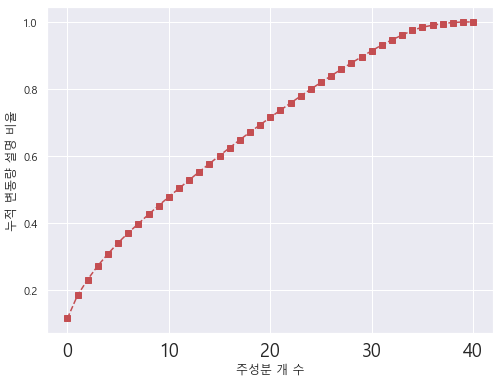

In [58]:
pca = PCA(svd_solver='arpack').fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'rs--')
plt.xlabel('주성분 개 수'); plt.ylabel('누적 변동량 설명 비율');

In [59]:
pca = PCA(svd_solver='arpack', n_components=35)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print('X_scaled  크기 :   ', X.shape); print('X_pca  크기 :   ', X_pca.shape)
print('총변동량 설명비율 (%) :', np.sum(pca.explained_variance_ratio_)*100)

PCA(n_components=35, svd_solver='arpack')

X_scaled  크기 :    (3997, 42)
X_pca  크기 :    (3997, 35)
총변동량 설명비율 (%) : 97.46313657662887


In [60]:
np.trace(X_pca.T@X_pca)/np.trace(X_scaled.T@X_scaled)

0.9746313657662882

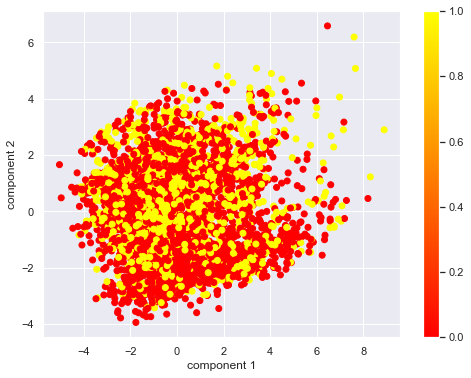

In [61]:
sns.set()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='autumn')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

<Figure size 576x432 with 0 Axes>

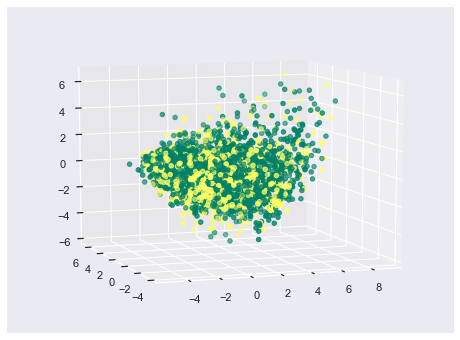

In [62]:
pca = PCA(svd_solver='arpack', n_components=3)
X_pca = pca.fit_transform(X_scaled)
from mpl_toolkits import mplot3d
plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='summer')
ax.view_init(10, 250) 

# 참고자료 (선형대수) - linear algebra with python
## Linear algebra (numpy.linalg) 
https://numpy.org/doc/stable/reference/routines.linalg.html

### 1. 원 자료

In [171]:
x = pd.DataFrame(np.array([[2,3,11],[3,5,8], [4,7,5], [3,5,8]]))
x

,0,1,2
0,2,3,11
1,3,5,8
2,4,7,5
3,3,5,8


In [143]:
x.cov()

,0,1,2
0,0.666667,1.333333,-2.0
1,1.333333,2.666667,-4.0
2,-2.000000,-4.000000,6.0


### 2. 평균 조정된 자료(mean_centering)

In [172]:
x - x.mean()

,0,1,2
0,-1.0,-2.0,3.0
1,0.0,0.0,0.0
2,1.0,2.0,-3.0
3,0.0,0.0,0.0


In [173]:
(x - x.mean()).T@(x - x.mean())/3  # 전체 관측개수에서 자유도 1을 차감하면 3

,0,1,2
0,0.666667,1.333333,-2.0
1,1.333333,2.666667,-4.0
2,-2.000000,-4.000000,6.0


### 2. 표준화된 자료

In [167]:
from sklearn.preprocessing import StandardScaler

In [168]:
np.mean(x, 0)
scaler= StandardScaler().fit(x)
scaler.mean_

0    3.0
1    5.0
2    8.0
dtype: float64

array([3., 5., 8.])

In [169]:
np.std(X, 0)
scaler.scale_

0    0.707107
1    1.414214
2    2.121320
dtype: float64

array([0.70710678, 1.41421356, 2.12132034])

In [170]:
x_scaled = pd.DataFrame(scaler.transform(x))
x_scaled

,0,1,2
0,-1.414214,-1.414214,1.414214
1,0.000000,0.000000,0.000000
2,1.414214,1.414214,-1.414214
3,0.000000,0.000000,0.000000
